In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv(r"C:\Users\rajak\OneDrive\Documents\Forage\data\BA_reviews.csv")

In [4]:
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | An airline that lives in the...
1,1,✅ Trip Verified | Check-in Desk rude and dism...
2,2,✅ Trip Verified | I chose British Airways espe...
3,3,Not Verified | I booked Premium Economy from I...
4,4,✅ Trip Verified | A simple story with an unfor...


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.shape[0]

3611

In [7]:
for i in range(0,df.shape[0]):
    try:
        df.loc[i, 'reviews'] = df.loc[i, 'reviews'].split('|')[1]
    except:
        pass   

In [8]:
df.head()

,reviews
0,An airline that lives in their past glory and...
1,Check-in Desk rude and dismissive. Flight la...
2,I chose British Airways especially because I ...
3,I booked Premium Economy from INV to LAX (via...
4,A simple story with an unfortunate outcome th...


In [9]:
df['reviews'][0]

' An airline that lives in their past glory and heading a future of crisis is British Airways. I am not joking we are a family of 7 all in Business Class heading for a Norwegian and Arctic Cruise and they lost 10 of our bags! They will never see me on any of their flights ever a disaster of an airline'

In [73]:
import re
import string
from tqdm import tqdm
from datetime import datetime
import dateutil.parser

In [74]:
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import random 

In [75]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rajak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
lang = stopwords.fileids()
lang

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [77]:
df.iloc[1][0]

'  Check-in Desk rude and dismissive. Flight late but seems the new norm. One world emerald, club world check-in. Staff uncommunicative, did not know what baggage allowance entitled to, once raised (politely) became argumentative and accusatory.'

In [78]:
from nltk.tokenize import TweetTokenizer
english_stopwords = stopwords.words('english')
hinglish_stopwords = stopwords.words('hinglish')

In [79]:
def clean_review(review):
    # Remove URLs, hashtags, mentions, and special characters
    review = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", review)
    review = re.sub(r"[^\w\s]", "", review)

    # Tokenize the tweet
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tokenizer.tokenize(review)

    # Remove stopwords for English and Hinglish
    tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]

    # Remove punctuation and convert to lowercase
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token.lower() for token in tokens]

    # Join tokens back into a string
    clean_review = ' '.join(tokens)

    return clean_review

In [80]:
df['Cleaned_reviews'] = df['reviews'].apply(clean_review)

In [81]:
df.head()

,reviews,Cleaned_reviews,Language,reviews_length
0,An airline that lives in their past glory and...,airline lives past glory heading future crisis...,en,163
1,Check-in Desk rude and dismissive. Flight la...,checkin desk rude dismissive flight late norm ...,en,168
2,I chose British Airways especially because I ...,chose british airways especially travel niece ...,en,567
3,I booked Premium Economy from INV to LAX (via...,booked premium economy inv lax lhr notified ca...,en,590
4,A simple story with an unfortunate outcome th...,simple story unfortunate outcome happen partne...,en,1203


In [82]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [83]:
df.Cleaned_reviews = df.Cleaned_reviews.apply(lambda x: clean_text(x))

In [84]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [85]:
df.Cleaned_reviews = df.Cleaned_reviews.apply(lambda x: tokenization(x))

In [86]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [87]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rajak\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [89]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

In [90]:
df.Cleaned_reviews = df.Cleaned_reviews.apply(lambda x: lemmatizer(x))

In [91]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [92]:
df.Cleaned_reviews = df.Cleaned_reviews.apply(lambda x: remove_digits(x))

In [93]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

df['Language'] = df['Cleaned_reviews'].apply(detect_language)

In [94]:
df.Language.value_counts()

Language
en    3606
Name: count, dtype: int64

In [95]:
df=df[df['Language']=='en']

In [96]:
df.head()

,reviews,Cleaned_reviews,Language,reviews_length
0,An airline that lives in their past glory and...,airline lives past glory heading future crisis...,en,163
1,Check-in Desk rude and dismissive. Flight la...,checkin desk rude dismissive flight late norm ...,en,168
2,I chose British Airways especially because I ...,chose british airways especially travel niece ...,en,567
3,I booked Premium Economy from INV to LAX (via...,booked premium economy inv lax lhr notified ca...,en,590
4,A simple story with an unfortunate outcome th...,simple story unfortunate outcome happen partne...,en,1203


In [97]:
df['reviews_length']=df['Cleaned_reviews'].str.len()

In [98]:
df.head()

,reviews,Cleaned_reviews,Language,reviews_length
0,An airline that lives in their past glory and...,airline lives past glory heading future crisis...,en,163
1,Check-in Desk rude and dismissive. Flight la...,checkin desk rude dismissive flight late norm ...,en,168
2,I chose British Airways especially because I ...,chose british airways especially travel niece ...,en,567
3,I booked Premium Economy from INV to LAX (via...,booked premium economy inv lax lhr notified ca...,en,590
4,A simple story with an unfortunate outcome th...,simple story unfortunate outcome happen partne...,en,1203


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
reviews_length,3606.0,492.887965,307.845239,58.0,273.0,416.0,620.75,2162.0


In [100]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [101]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#creating an object of sentiment intensity analyzer
sia= SentimentIntensityAnalyzer()

In [102]:
df['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df['Cleaned_reviews'])]


100%|██████████| 3606/3606 [00:01<00:00, 1965.92it/s]


In [103]:
df['overall_sentiment'] = df['sentiment'].apply(label_sentiment)

In [104]:
df.head()

,reviews,Cleaned_reviews,Language,reviews_length,sentiment,overall_sentiment
0,An airline that lives in their past glory and...,airline lives past glory heading future crisis...,en,163,-0.7269,negative
1,Check-in Desk rude and dismissive. Flight la...,checkin desk rude dismissive flight late norm ...,en,168,-0.5267,negative
2,I chose British Airways especially because I ...,chose british airways especially travel niece ...,en,567,-0.8591,negative
3,I booked Premium Economy from INV to LAX (via...,booked premium economy inv lax lhr notified ca...,en,590,-0.6249,negative
4,A simple story with an unfortunate outcome th...,simple story unfortunate outcome happen partne...,en,1203,0.7964,positive


In [105]:
df['reviews'][4]

" A simple story with an unfortunate outcome that really could happen to anyone. My partner and I recently started working after studying purchased two tickets to travel from London City Airport to Frankfurt. When we purchased the tickets, I mistakenly entered my name twice (e.g. Mr John Smith and Ms John Smith). Little did we know that our 1 simple mistake would cost us over 300 pounds. Upon arriving at the airport we were told there was no way to change the name (apparently they can only change 3 letters where there has been a typo?) and I had no other option to purchase the last remaining ticket if I wanted to board the flight - the price: almost seven times (!) higher than my original ticket. Zero empathy was shown. Zero alternative was offered. Trusting BA's staff and under the pretence that there was apparently no other way we could board the flight we bought this ticket. Immediately after I purchased the ticket I contacted BA's 'Commercial Change Booking Team' and informed them 

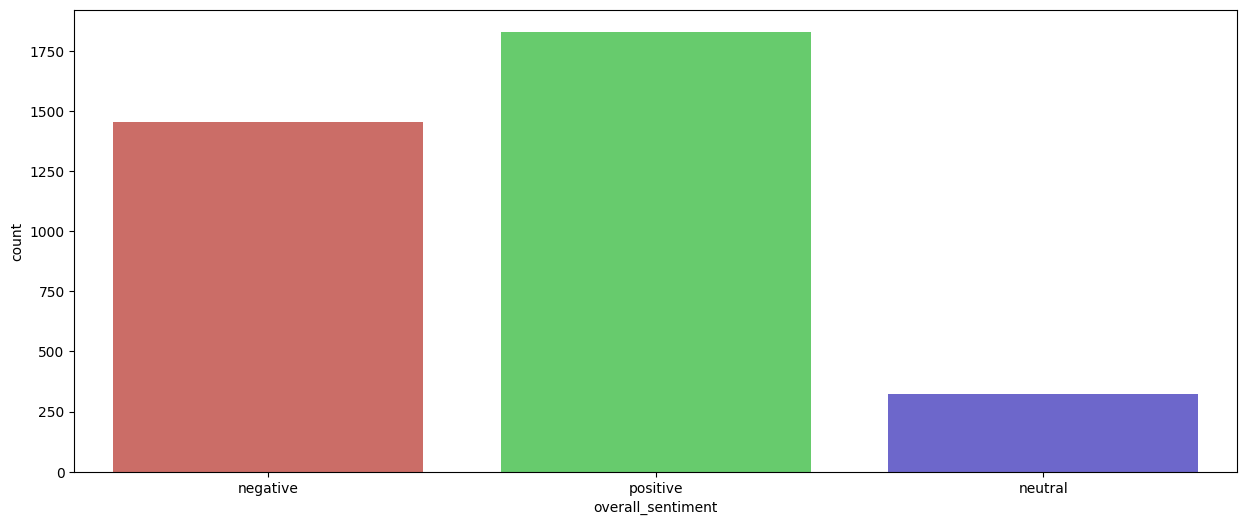

In [106]:
plt.figure(figsize=(15,6))
sns.countplot(x='overall_sentiment', data = df ,palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

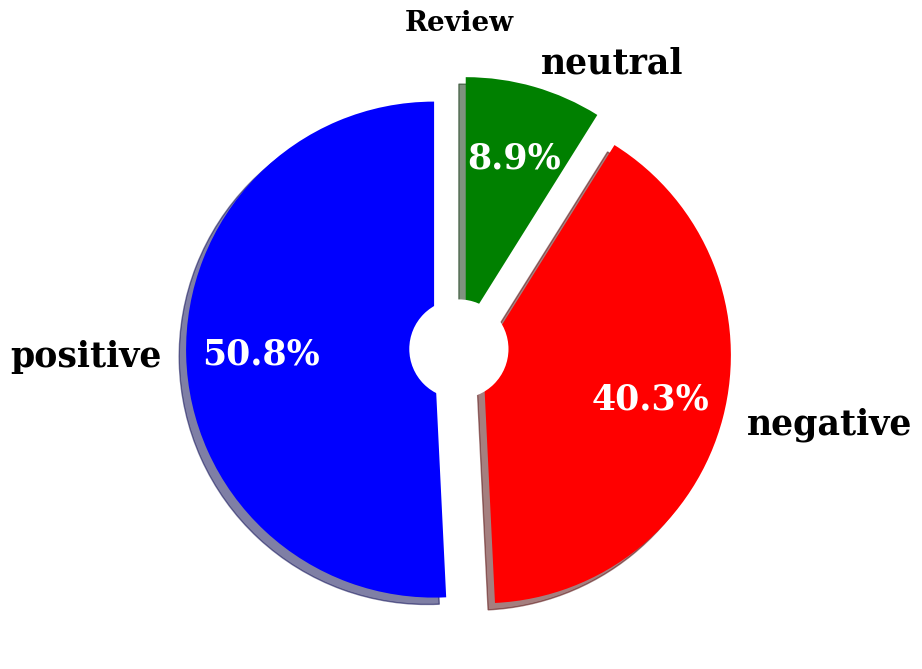

In [152]:
label_data = df['overall_sentiment'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(8, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green'],
                               pctdistance = 0.70,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Review', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.20,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [111]:
df[df['overall_sentiment']=='positive'].head()

,reviews,Cleaned_reviews,Language,reviews_length,sentiment,overall_sentiment
4,A simple story with an unfortunate outcome th...,simple story unfortunate outcome happen partne...,en,1203,0.7964,positive
6,Fast and friendly check in (total contrast t...,fast friendly check total contrast gatwick con...,en,363,0.9612,positive
7,I don't understand why British Airways is cl...,understand british airways classified 4 star a...,en,326,0.9360,positive
10,"Another really great pair of flights, on time...",great pair flights time problems champagne mea...,en,154,0.9674,positive
16,BA is not treating its premium economy passen...,ba treating premium economy passengers respect...,en,136,0.4404,positive


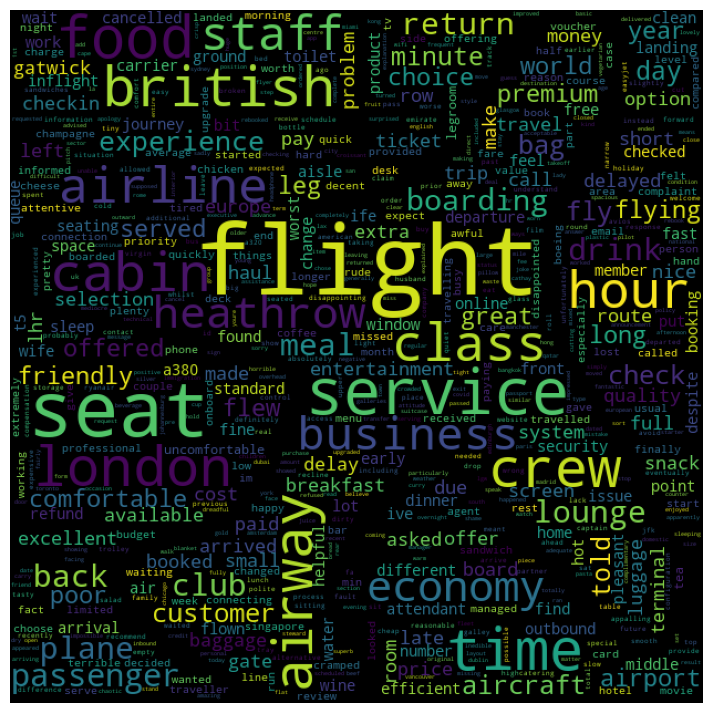

In [142]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
data=df['Cleaned_reviews']
mask = np.array(Image.open(r"C:\Users\rajak\OneDrive\Documents\Forage\aero.jpeg"))

plt.figure(figsize=(16,9))
wcl=WordCloud(max_words=1000,width=1600,height=800,collocations=False,mask=mask,stopwords=['ba']).generate(" ".join(data))
plt.imshow(wcl)
plt.axis('off')
plt.show()

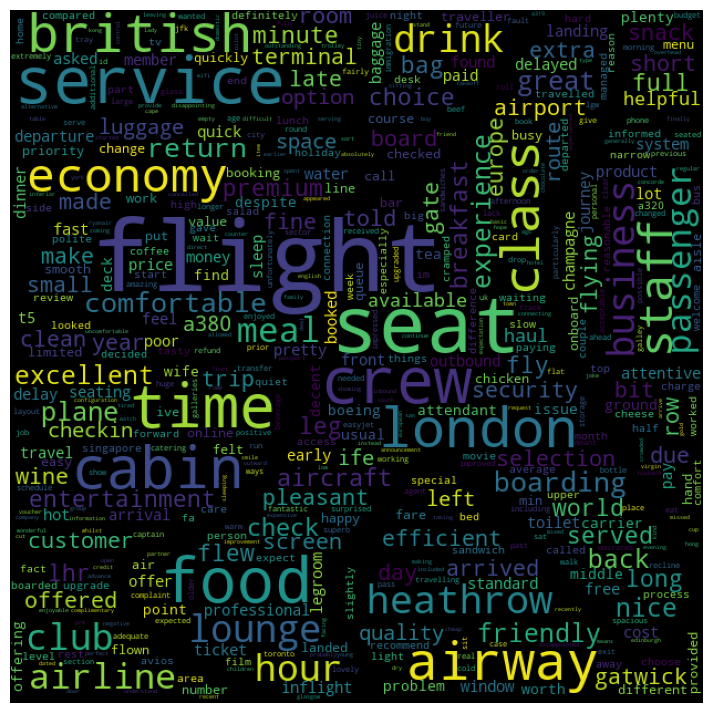

In [144]:
#POSITIVE
from wordcloud import WordCloud
data=df[df['overall_sentiment']=='positive']['Cleaned_reviews']
plt.figure(figsize=(16,9))
wcl=WordCloud(max_words=500,width=1400,height=600,collocations=False,mask=mask,stopwords=['ba']).generate(" ".join(data))
plt.imshow(wcl)
plt.axis('off')
plt.show()

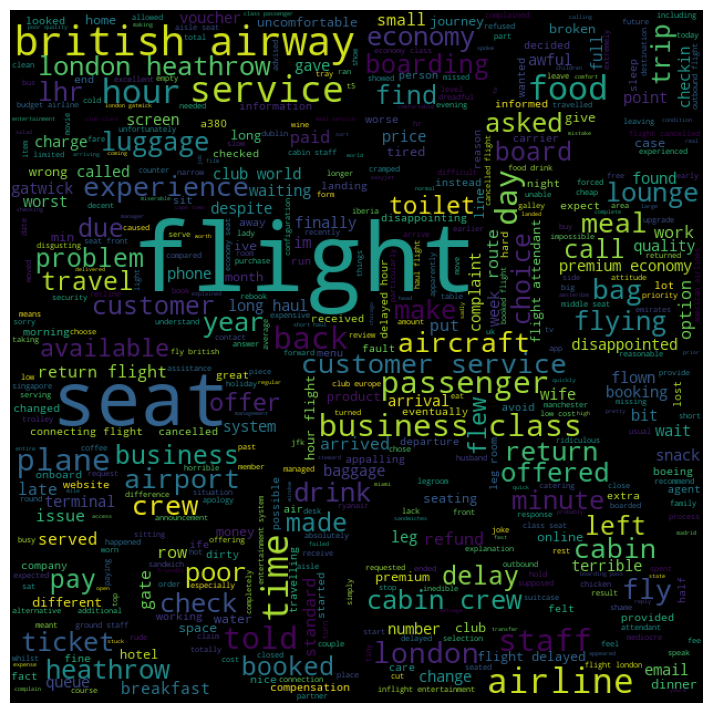

In [145]:
#Negative
from wordcloud import WordCloud
data=df[df['overall_sentiment']=='negative']['Cleaned_reviews']
mask = np.array(Image.open(r"C:\Users\rajak\OneDrive\Documents\Forage\aero.jpeg"))
plt.figure(figsize=(16,9))
wcl=WordCloud(max_words=500,width=1400,height=600,collocations=True,stopwords=['ba'],mask=mask).generate(" ".join(data))
plt.imshow(wcl)
plt.axis('off')
plt.show()


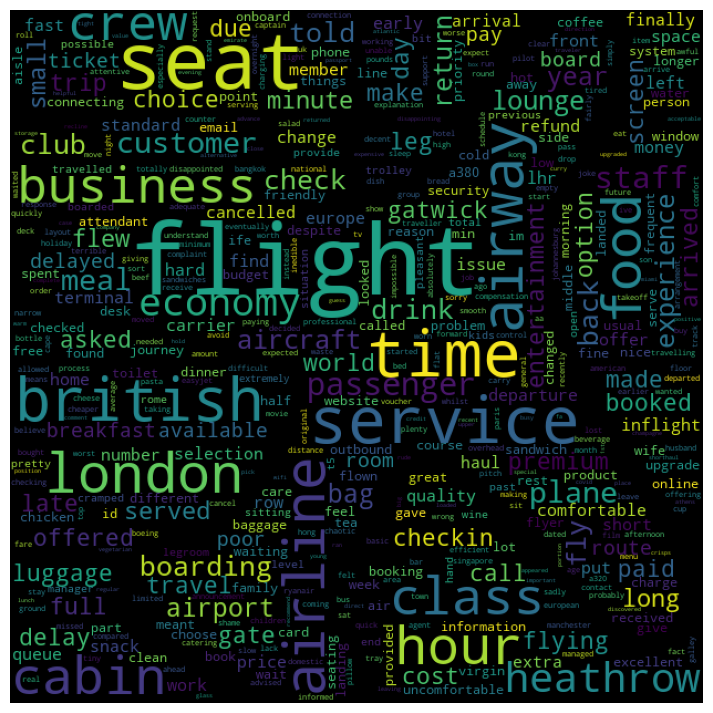

In [146]:
#Negative

mask = np.array(Image.open(r"C:\Users\rajak\OneDrive\Documents\Forage\aero.jpeg"))
from wordcloud import WordCloud
data=df[df['overall_sentiment']=='neutral']['Cleaned_reviews']
plt.figure(figsize=(16,9))
wcl=WordCloud(max_words=500,width=1400,height=600,collocations=False,mask=mask,stopwords=['ba']).generate(" ".join(data))
plt.imshow(wcl)
plt.axis('off')
plt.show()

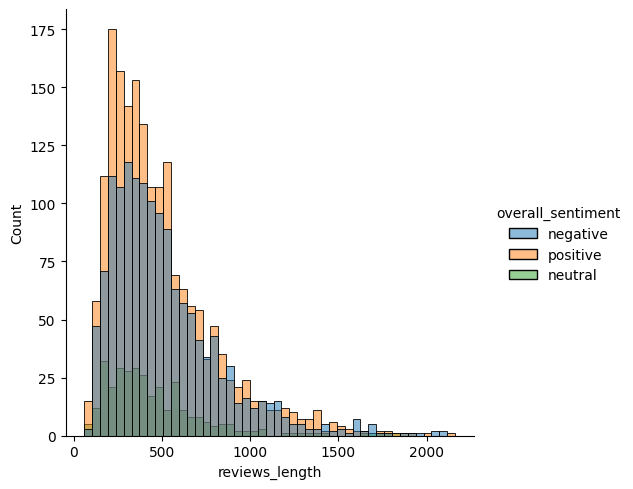

In [158]:
sns.displot(x=df['reviews_length'],hue=df['overall_sentiment'])

In [170]:
review_list=df[['Cleaned_reviews']].values.tolist()

In [174]:
len(X)

3606

In [175]:

from transformers import pipeline
sentiment_pipeline = pipeline(model="siebert/sentiment-roberta-large-english")
reviews_sentiments = pd.DataFrame.from_dict(sentiment_pipeline(review_list))

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
Exception ignored in: <function tqdm.__del__ at 0x000001FD58C5D4E0>
Traceback (most recent call last):
  File "c:\Users\rajak\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\std.py", line 1145, in __del__
    self.close()
  File "c:\Users\rajak\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.